Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


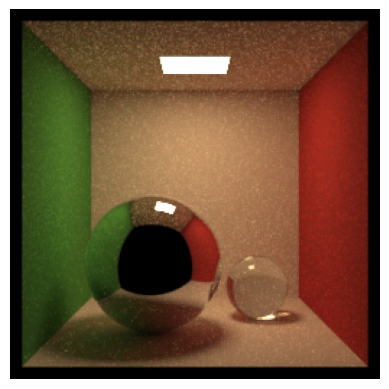

In [15]:
import mitsuba as mi
import matplotlib.pyplot as plt

mi.set_variant('scalar_rgb')

scene = mi.load_file("/home/asma/Desktop/CG/installing/scenes/cbox.xml")

image = mi.render(scene, spp=256)


plt.axis("off")
plt.imshow(image ** (1.0 / 2.2)); 

#mi.util.write_bitmap("my_first_render.png", image)
#mi.util.write_bitmap("my_first_render.exr", image)


In [19]:
import drjit as dr
import mitsuba as mi
mi.set_variant('scalar_rgb')

scene = mi.load_file("/home/asma/Desktop/CG/installing/scenes/simple.xml")


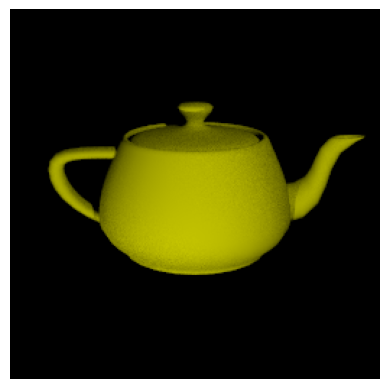

In [20]:
original_image = mi.render(scene, spp=128)

import matplotlib.pyplot as plt
plt.axis('off')
plt.imshow(original_image ** (1.0 / 2.2));

In [21]:
params = mi.traverse(scene)
print(params)

SceneParameters[
  ------------------------------------------------------------------------------------
  Name                             Flags    Type        Parent
  ------------------------------------------------------------------------------------
  sensor.near_clip                          float       PerspectiveCamera
  sensor.far_clip                           float       PerspectiveCamera
  sensor.shutter_open                       float       PerspectiveCamera
  sensor.shutter_open_time                  float       PerspectiveCamera
  sensor.film.size                          Vector2u    HDRFilm
  sensor.film.crop_size                     Vector2u    HDRFilm
  sensor.film.crop_offset                   Point2u     HDRFilm
  sensor.x_fov                     ∂, D     float       PerspectiveCamera
  sensor.to_world                  ∂, D     Transform4f PerspectiveCamera
  teapot.bsdf.reflectance.value    ∂        Color3f     SRGBReflectanceSpectrum
  teapot.faces                

In [22]:
print('sensor.near_clip:             ',  params['sensor.near_clip'])
print('teapot.bsdf.reflectance.value:',  params['teapot.bsdf.reflectance.value'])
print('light1.intensity.value:       ',  params['light1.intensity.value'])

sensor.near_clip:              0.009999999776482582
teapot.bsdf.reflectance.value: [0.8999999761581421, 0.8999999761581421, 0.0]
light1.intensity.value:        [100.0, 100.0, 100.0]


In [23]:
# Give a red tint to light1 and a green tint to light2
params['light1.intensity.value'] *= [1.5, 0.2, 0.2]
params['light2.intensity.value'] *= [0.2, 1.5, 0.2]

# Apply updates
params.update();

In [28]:
""" # Translate the teapot a little bit
V = dr.unravel(mi.Point3f, params['teapot.vertex_positions'])
V.z += 0.5
params['teapot.vertex_positions'] = dr.ravel(V)

# Apply changes
params.update(); """

" # Translate the teapot a little bit\nV = dr.unravel(mi.Point3f, params['teapot.vertex_positions'])\nV.z += 0.5\nparams['teapot.vertex_positions'] = dr.ravel(V)\n\n# Apply changes\nparams.update(); "

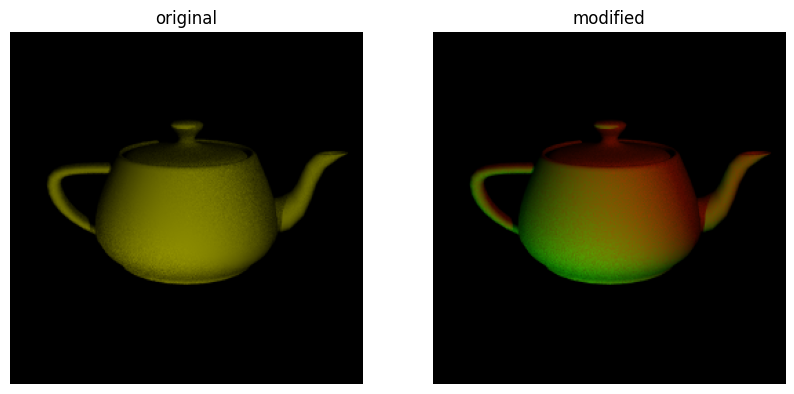

In [30]:
modified_image = mi.render(scene, spp=256)
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1,2,1).imshow(original_image); plt.axis('off'); plt.title('original')
fig.add_subplot(1,2,2).imshow(modified_image); plt.axis('off'); plt.title('modified');